# PRCP-1021-InsCostPred

## Problem Statement

Task 1:- 
    Prepare a complete data analysis report on the given data.
    
Task 2:-

● Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will solve.

● Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.

Task 3:-  
    Create a machine learning model to predict the insurance price charged to the customer. The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.

### Dataset Description 

In order to make their profit, insurance companies must collect a higher premium than the amount which may become due to the insured person. To achieve this, insurance companies invest a lot of time, effort, and money in creating models that accurately predict healthcare expenses.

Note: The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

Attribute Information:

●	age: age of primary beneficiary

●	sex: beneficiary’s gender - female or male

●	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

●	children: Number of children covered by health insurance / Number of dependents

●	smoker: Smoking or non-smoking

●	region: the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.

●	charges: Individual medical costs billed by health insurance (to be predicted)

●	Id: id of beneficiary


## Business case : To predict the insurance price charged to the customer

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
insurance_dataset = pd.read_csv('.\Data\datasets_13720_18513_insurance(1).csv')

### Basic checks

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
insurance_dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
insurance_dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Observations from Basic checks:
1. No missing values in insurance_dataset
2. sex, smoker and region are categorical columns

## Exploratory data analysis

### Univariate Analysis 

                                             |                                             | [  0%]   00:00 ->…


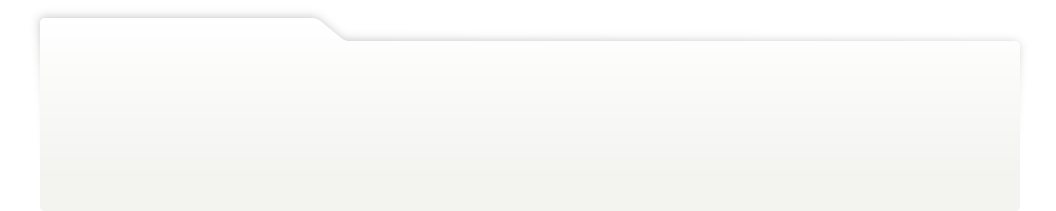
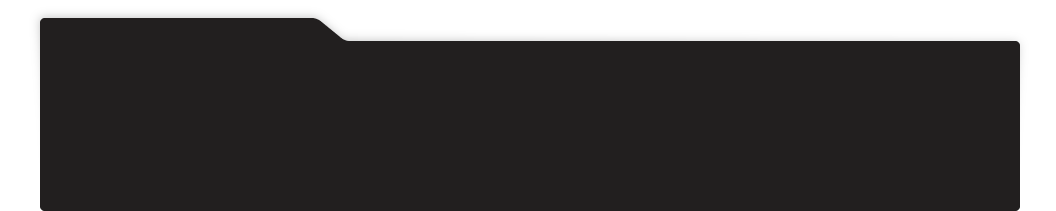
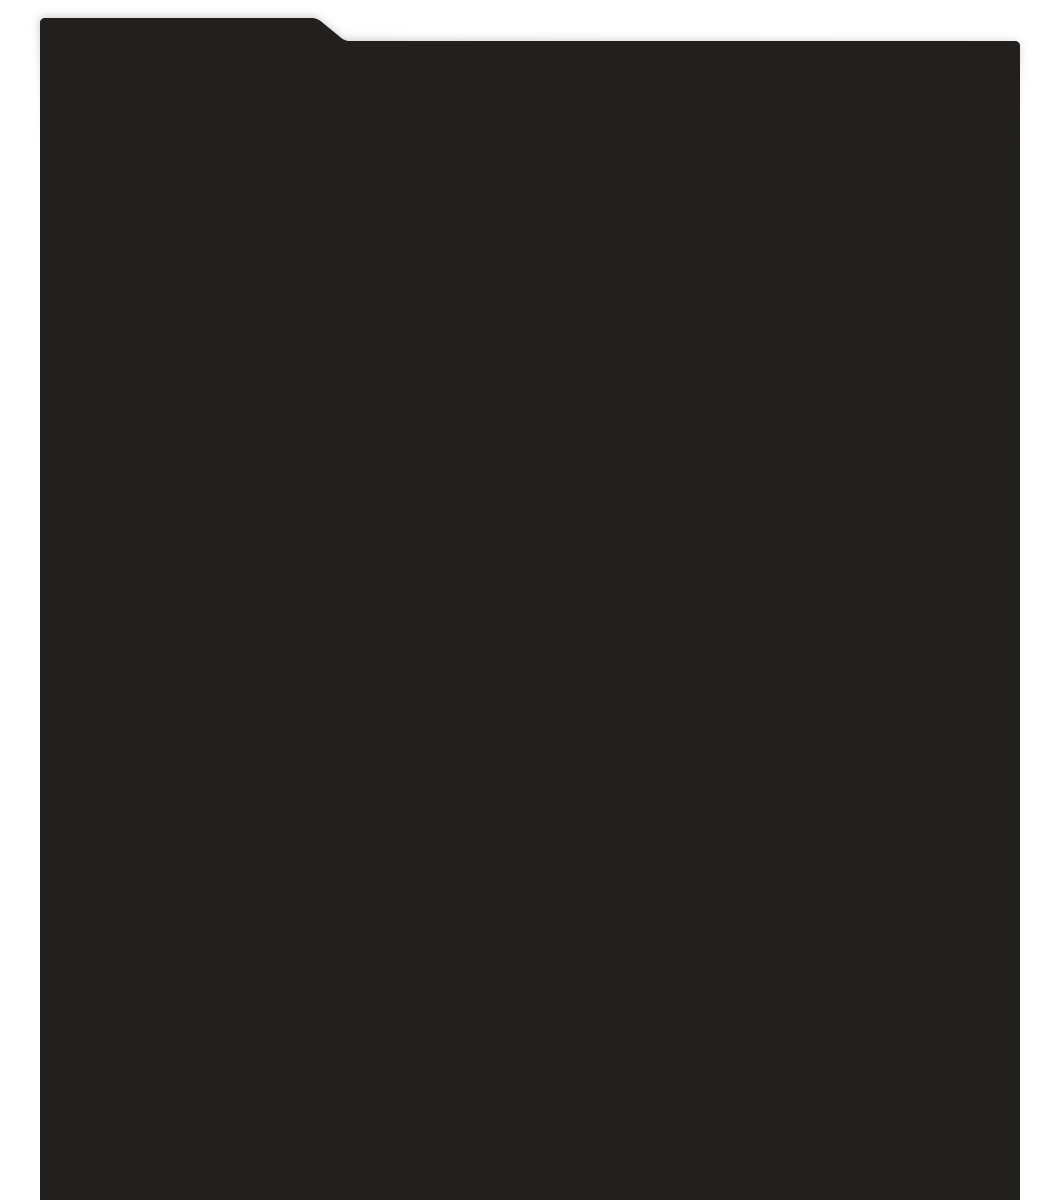
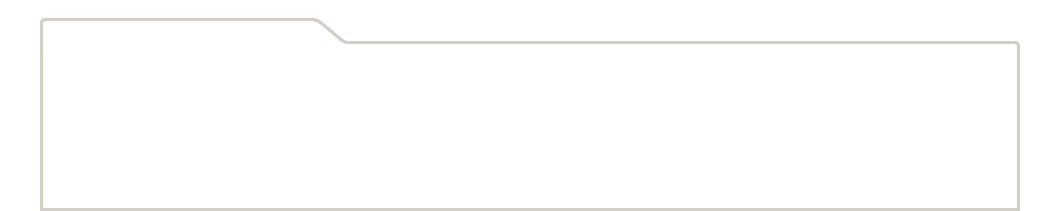
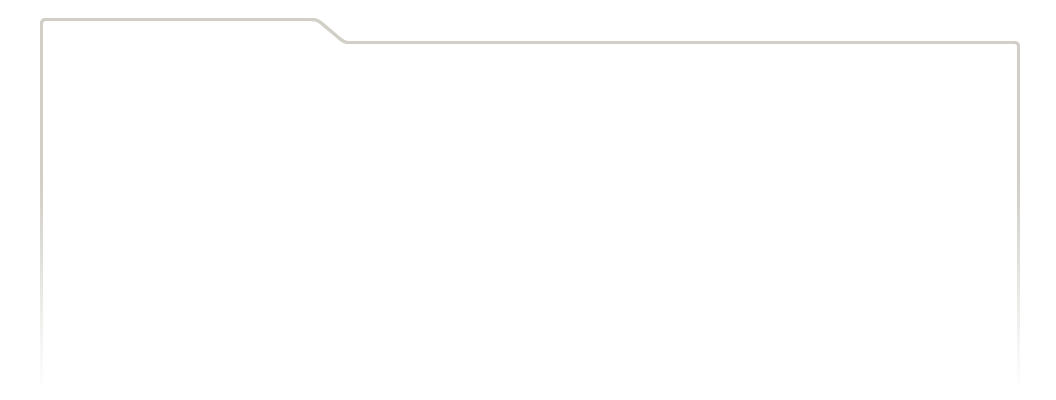
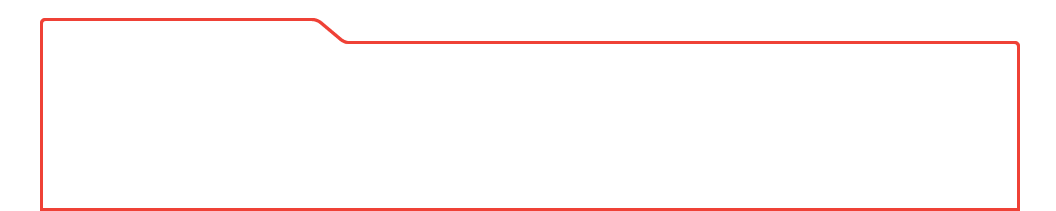
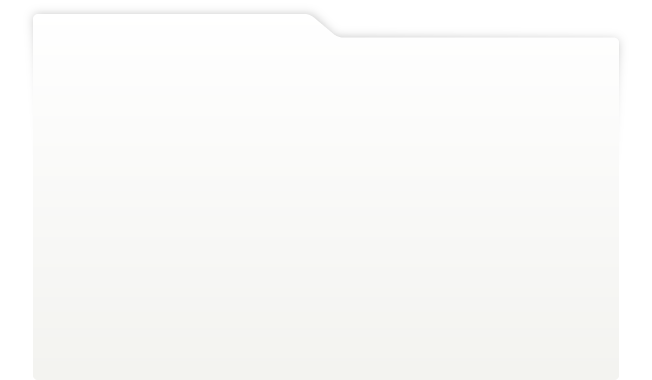
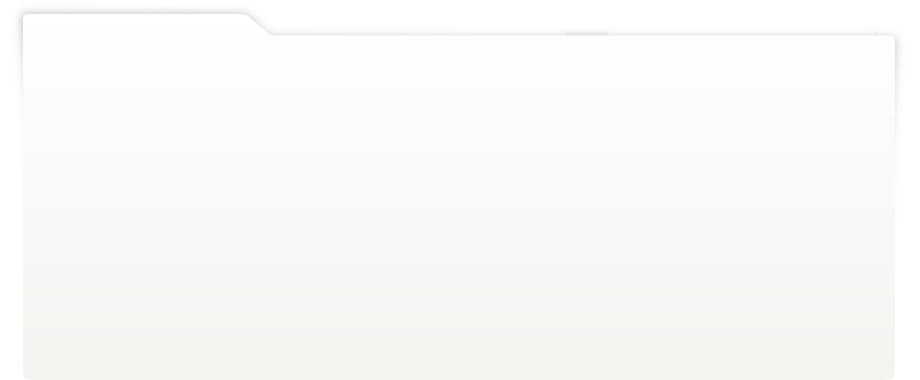
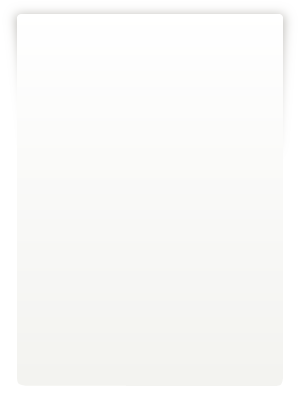
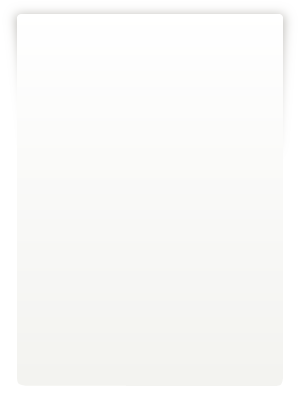
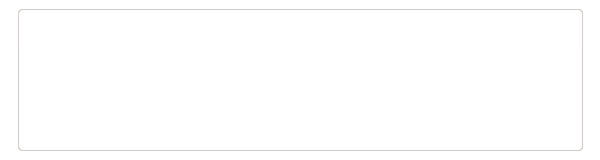
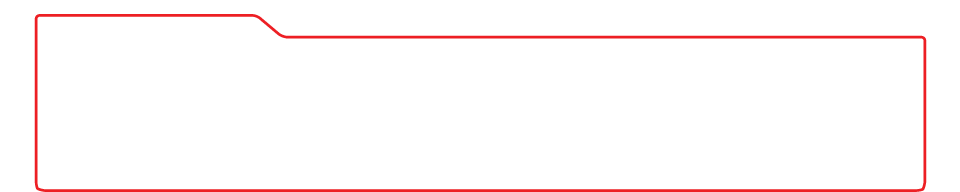
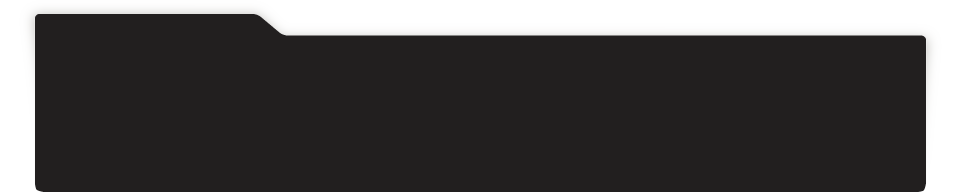
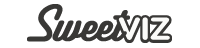
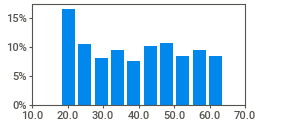
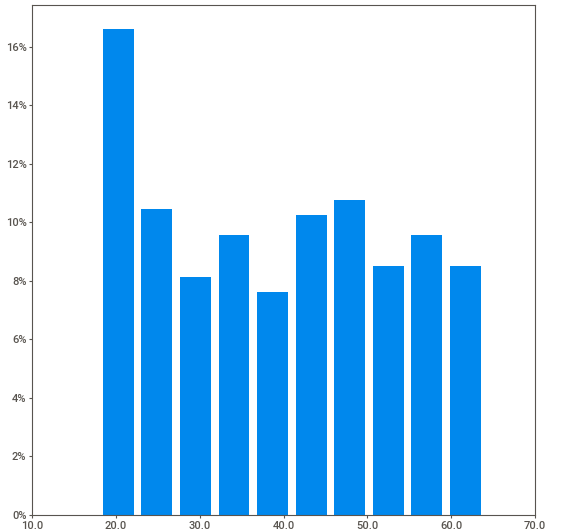
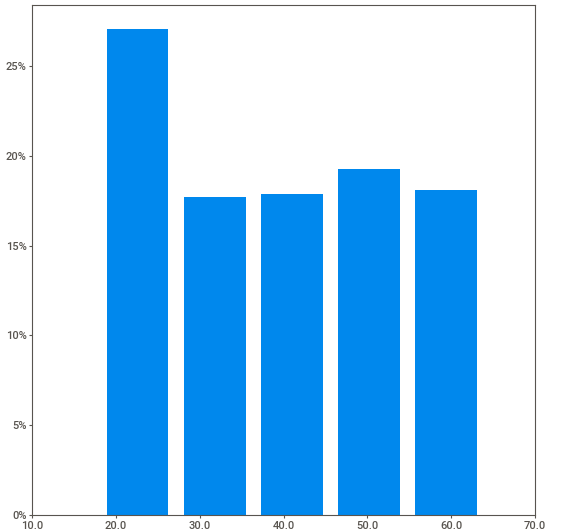
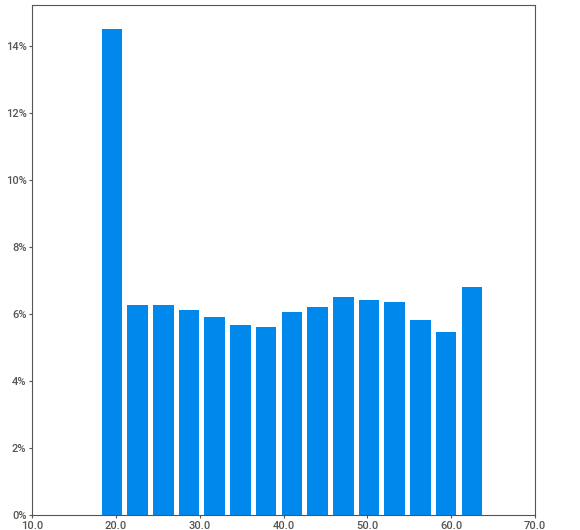
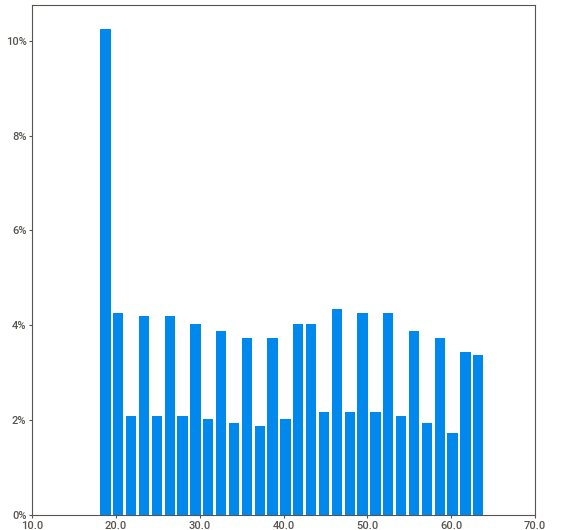
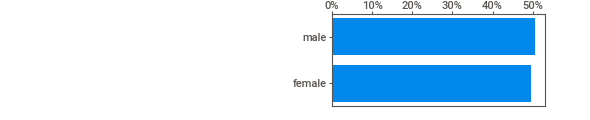
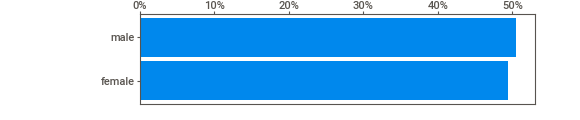
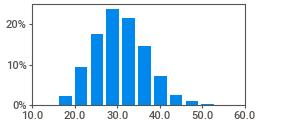
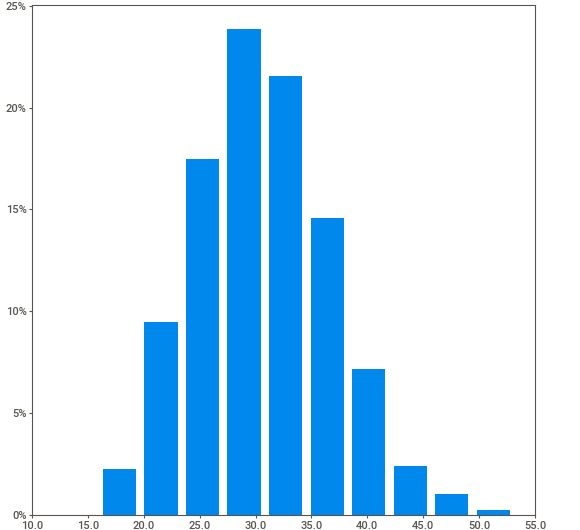
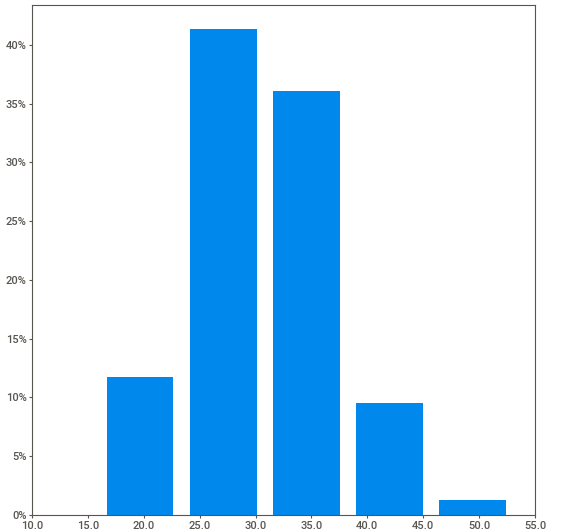
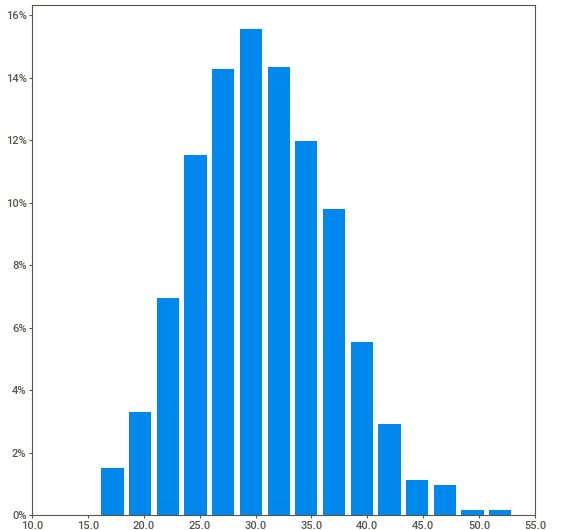
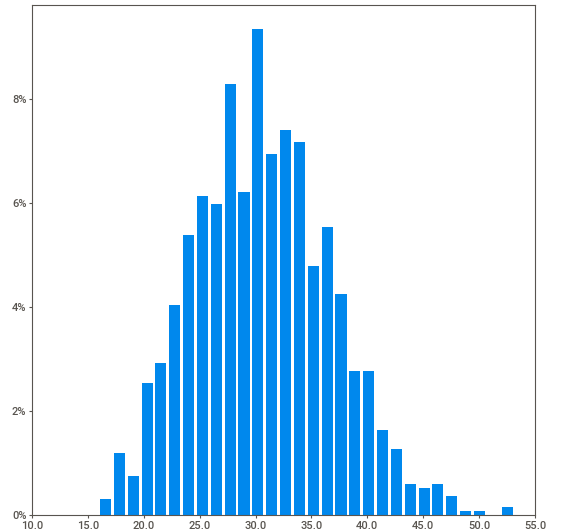
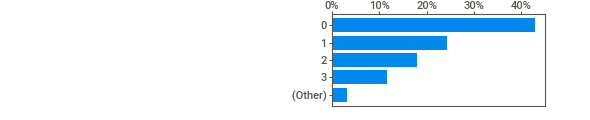
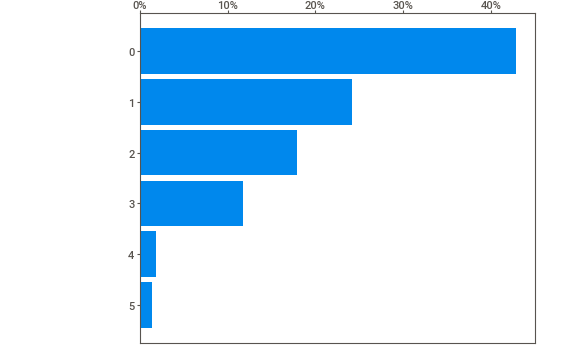
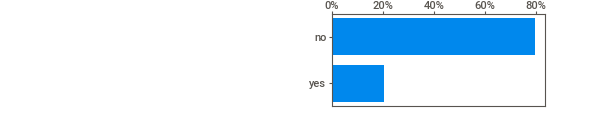
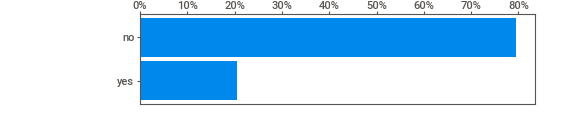
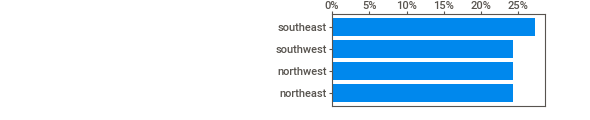
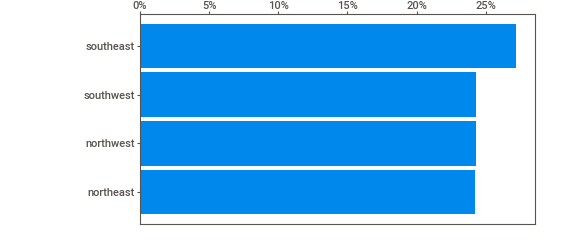
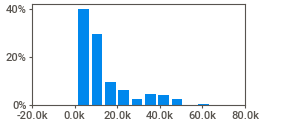
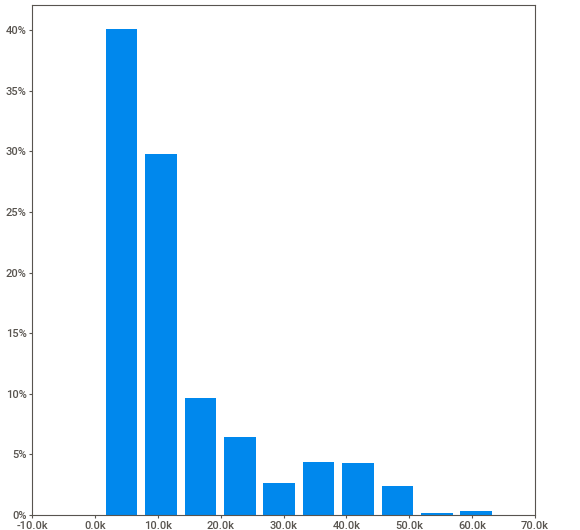
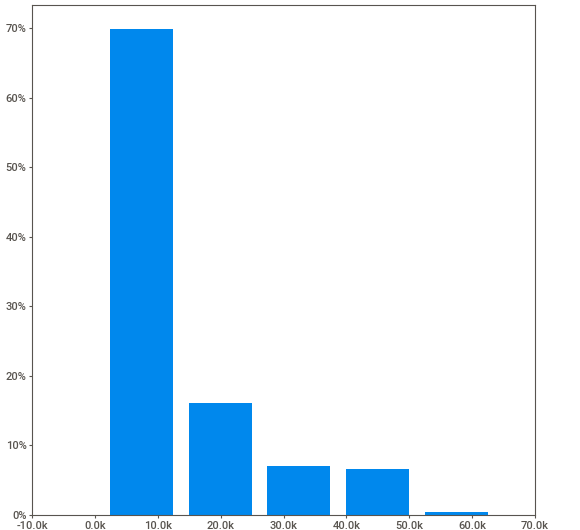
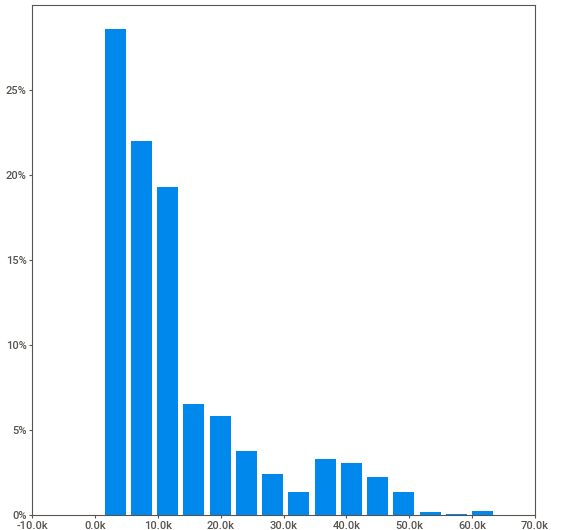
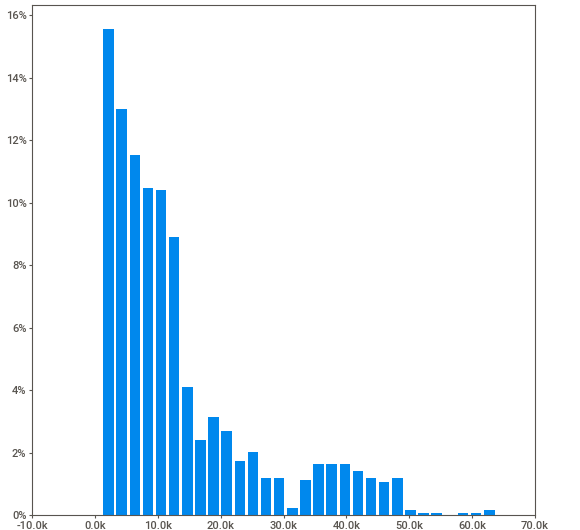
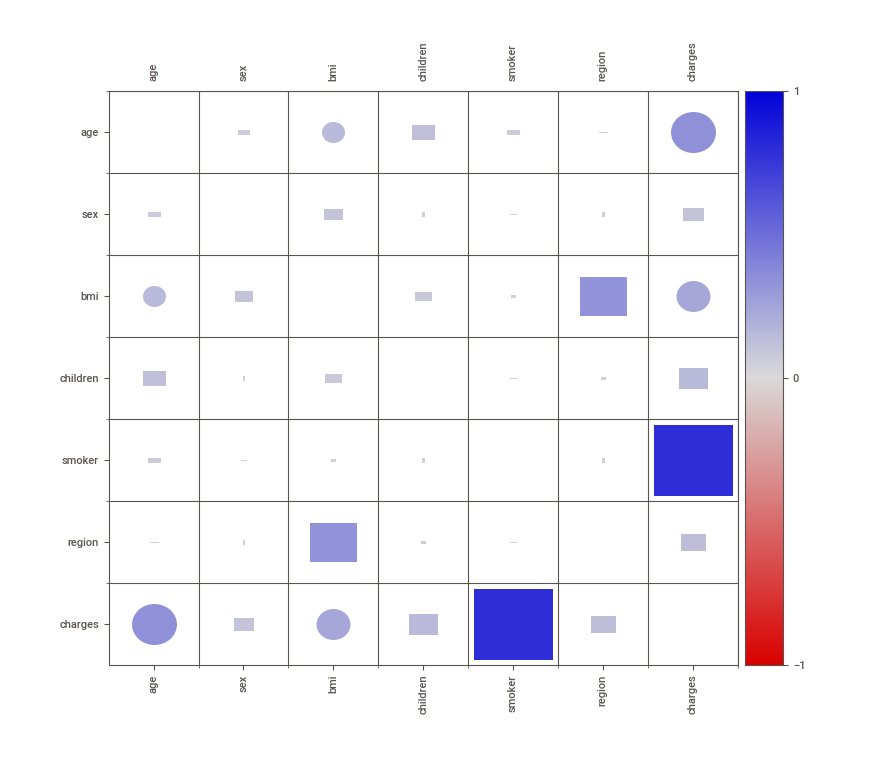
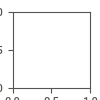

In [9]:
# Using Automated library for univariate analysis
import sweetviz as sv
my_report = sv.analyze(insurance_dataset)
my_report.show_notebook()

Observations from Univariate Analysis:
1. age column - numerical column - ranging between 18 and 64
2. sex column - categorical column - Total counts of Male and Female are similar
3. bmi column - numerical column -ranging between 16 and 53.1, data is normally distributed
4. children column - numerical column ranging between 0 to 5
5. smoker column - categorical column - nearly 80% dont smoke
6. religion column - categorical column with 4 regions
7. charges column - Individual medical costs billed by health insurance ranging between 1122 and 63770. Around 80% have been billed less than 20000 approximately

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

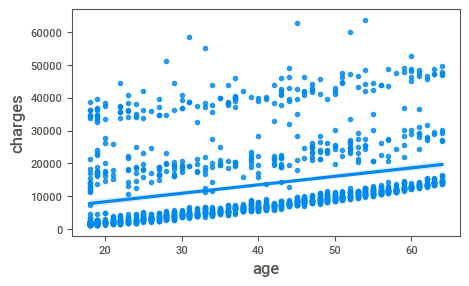

In [10]:
#Analyzing age column with respect to target charges column
plt.rcParams["figure.figsize"] = (5,3)
sns.regplot(x= 'age',y='charges', data=insurance_dataset)

When Age increases, charges also increases.

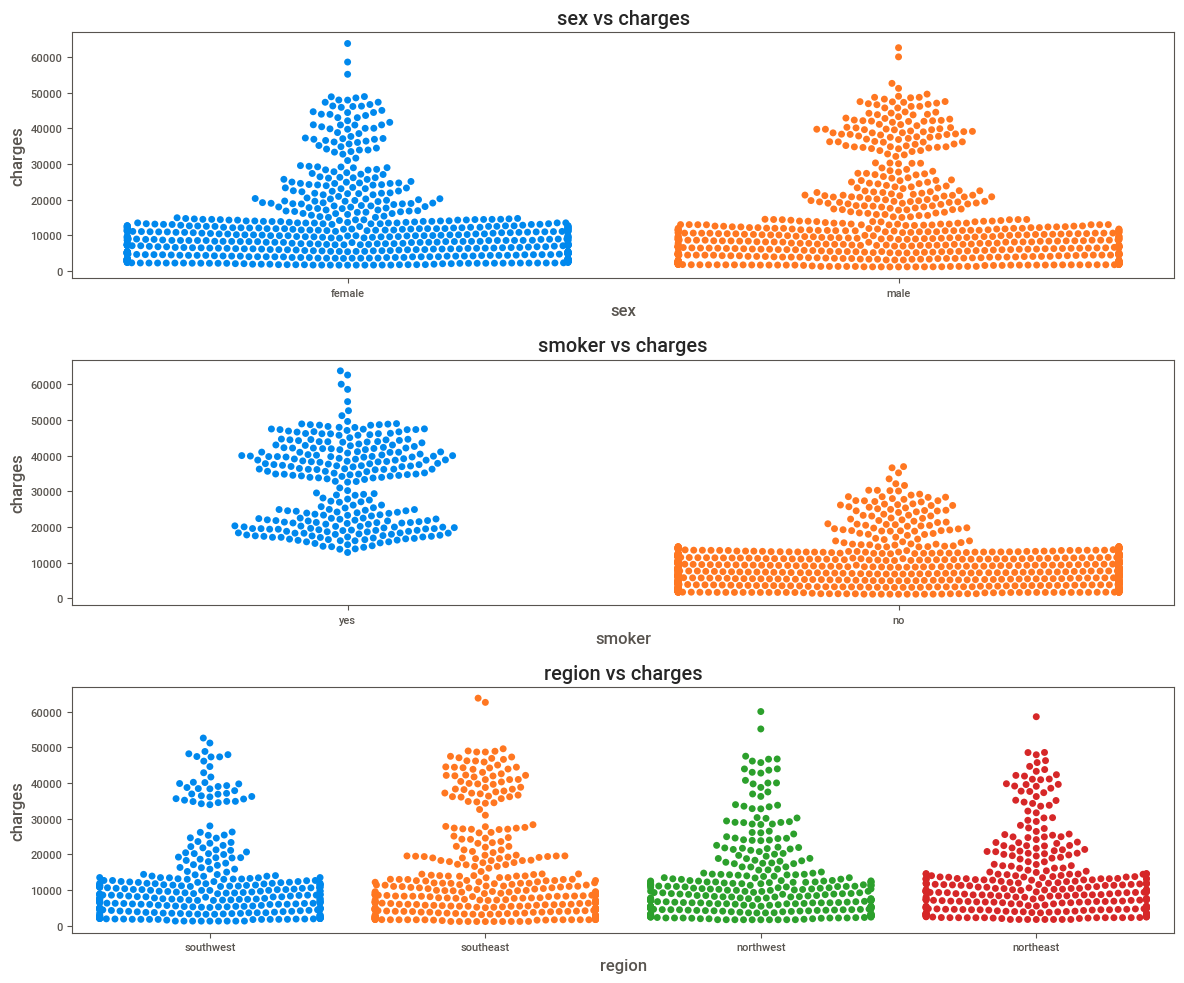

In [11]:
#Analyzing sex,smoker and region with respect to target charges
plt.rcParams["figure.figsize"] = (12,10)
fig, axes = plt.subplots(3)
sns.swarmplot(x= 'sex',y='charges', data=insurance_dataset, ax=axes[0]).set(title='sex vs charges')
sns.swarmplot(x= 'smoker',y='charges', data=insurance_dataset,ax=axes[1]).set(title='smoker vs charges')
sns.swarmplot(x= 'region',y='charges', data=insurance_dataset,ax=axes[2]).set(title='region vs charges')
plt.tight_layout()

Observations:

1. Both Male and Female seems to be equally distributed with respect to charges.

2. smokers are charged more when compared to Non smokers.

3. All the 4 regions seems to be equally distributed with respect to charges.

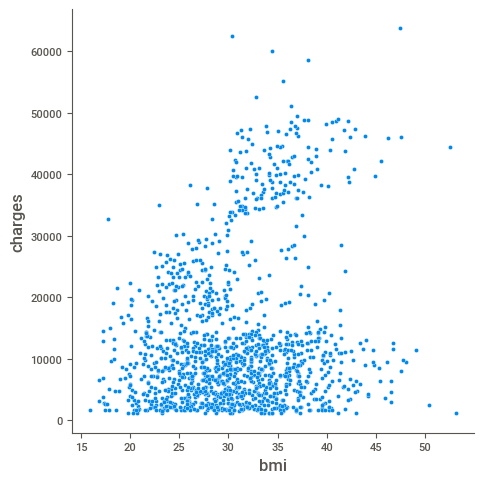

In [12]:
#Analyzing bmi column with respect to target charges column
plt.rcParams["figure.figsize"] = (5,3)
sns.relplot(x= 'bmi',y='charges', data=insurance_dataset)

When bmi increases, charges also increases.

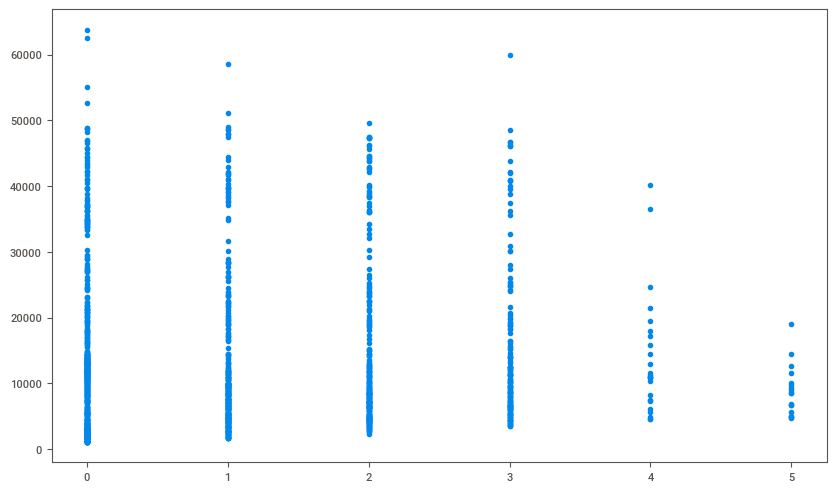

In [13]:
#Analyzing children column with respect to target charges column
plt.figure(figsize =(10, 6))
plt.scatter(insurance_dataset['children'],insurance_dataset['charges'])

When there are 4 or 5 children, charged amount is low

Observations from Bivariate Analysis:
1. When Age increases, charges also increases.
2. Both Male and Female seems to be equally distributed with respect to charges.
3. smokers are charged more when compared to Non smokers.
4. All the 4 regions seems to be equally distributed with respect to charges.
5. When bmi increases, charges also increases.
6. When there are 4 or 5 children, charged amount is low.

### Multivariate Analysis

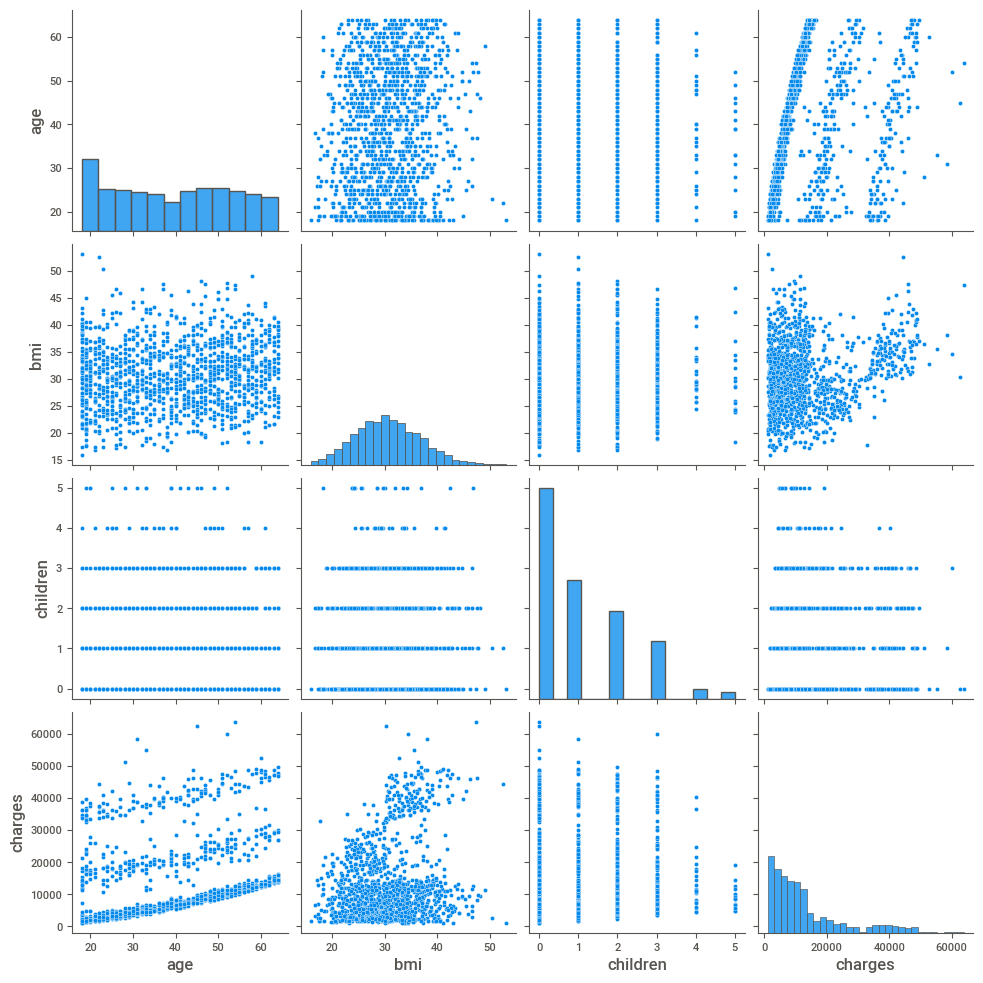

In [14]:
sns.pairplot(insurance_dataset)

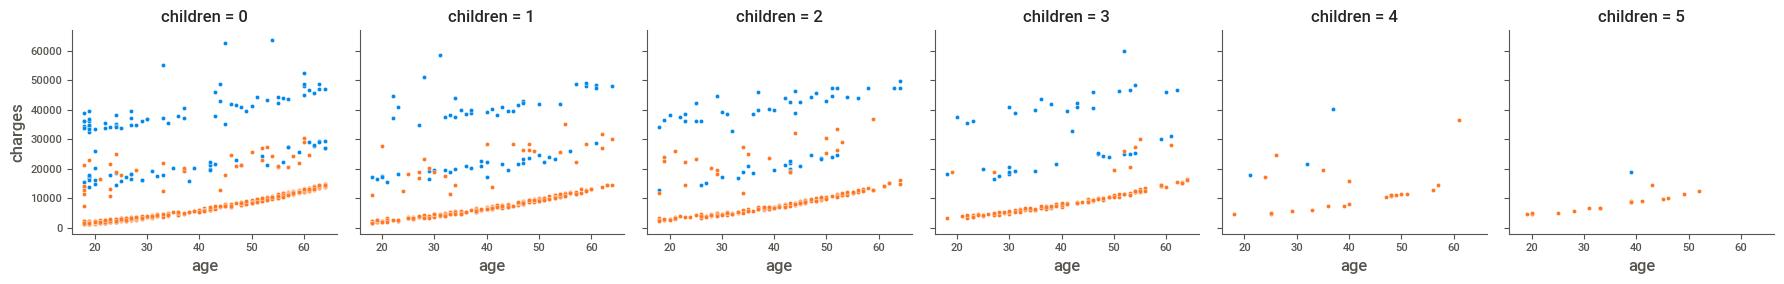

In [15]:
g = sns.FacetGrid(insurance_dataset, col="children",  hue="smoker")
g.map(sns.scatterplot, "age", "charges")

Smokers who have less than 3 children charged more when compared to smokers having 4 or 5 children

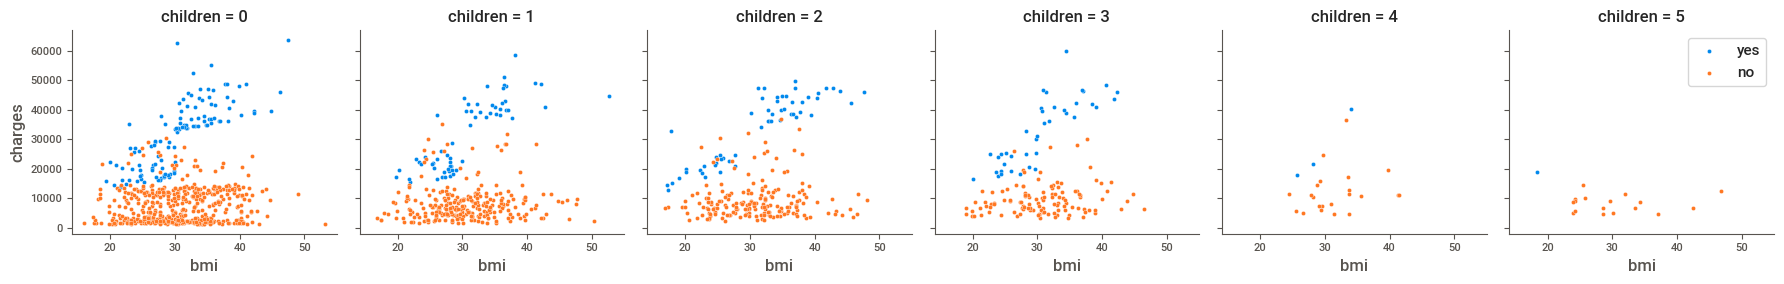

In [16]:
g = sns.FacetGrid(insurance_dataset, col="children",  hue="smoker")
g.map(sns.scatterplot, "bmi", "charges")
plt.legend()

When bmi of the smoker increases, charges are too high

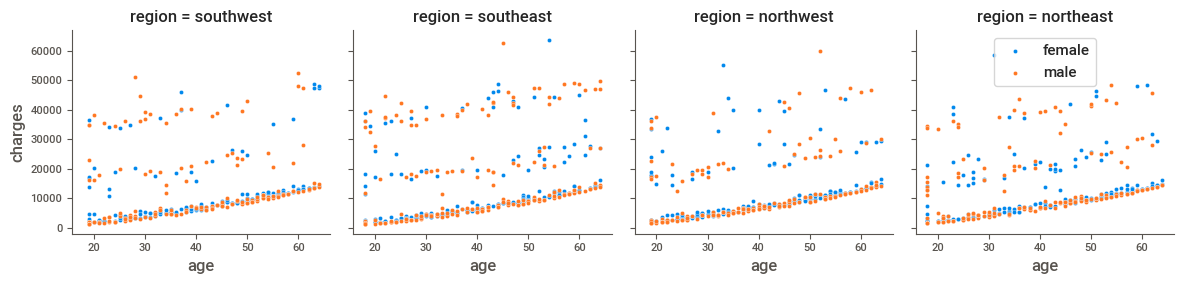

In [17]:
g = sns.FacetGrid(insurance_dataset, hue="sex",  col="region")
g.map(sns.scatterplot, "age", "charges")
plt.legend()

region and sex columns are evenly distributed with respect to age and charges column

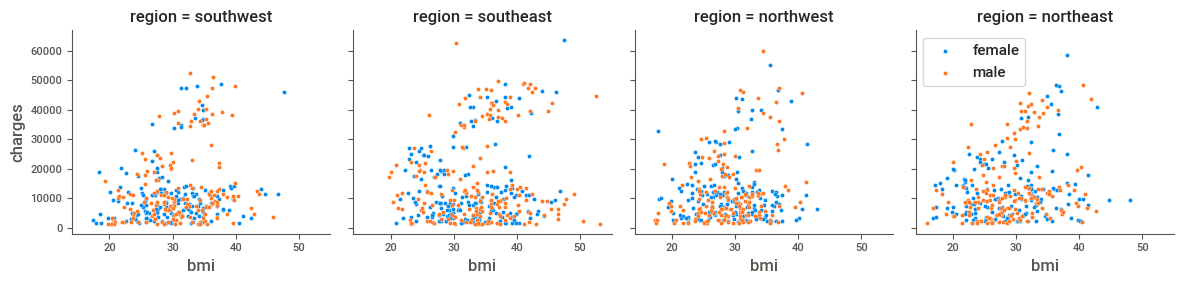

In [18]:
g = sns.FacetGrid(insurance_dataset, hue="sex",  col="region")
g.map(sns.scatterplot, "bmi", "charges")
plt.legend()

region and sex columns are evenly distributed with respect to bmi and charges column

Observations from Multivariate Analysis:
1. Smokers who have less than 3 children charged more when compared to smokers having 4 or 5 children.
2. When bmi of the smoker increases, charges are too high.
3. region and sex columns are evenly distributed with respect to age and charges column.
4. region and sex columns are evenly distributed with respect to bmi and charges column.

### Data Preprocessing and Feature Engineering

In [19]:
# Check for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values 

In [20]:
# Check for duplicate rows and remove duplicates
insurance_dataset[insurance_dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [21]:
#Displaying duplicates from the dataset
insurance_dataset[insurance_dataset['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [22]:
#Removing duplicates from the dataset
insurance_dataset.drop_duplicates(inplace=True)
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [23]:
# Ensuring there is no more duplicates in the dataset
insurance_dataset[insurance_dataset.duplicated()]

,age,sex,bmi,children,smoker,region,charges


Now there are no duplicate rows in insurance_dataset

In [24]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


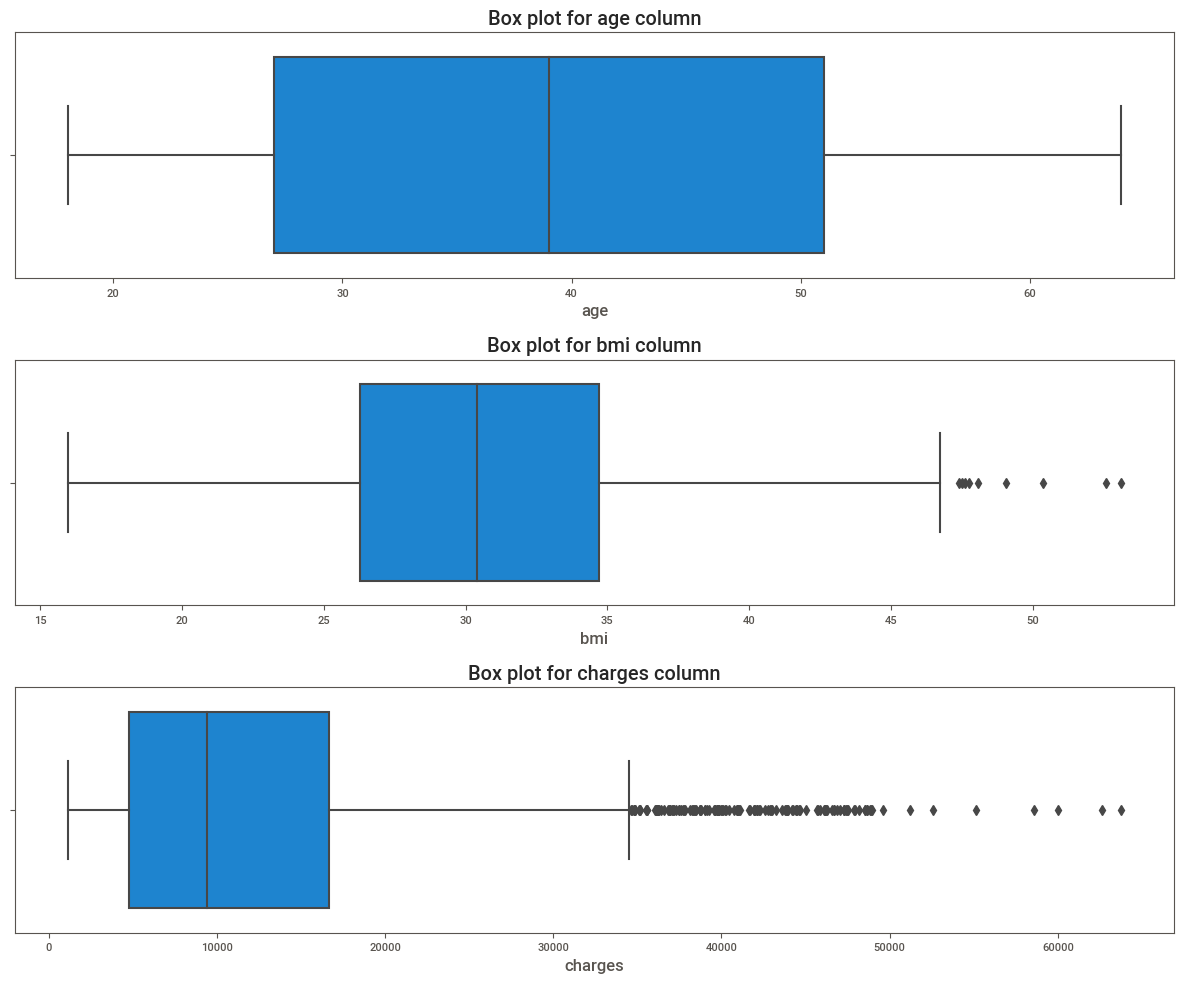

In [25]:
# Checking outliers
plt.rcParams["figure.figsize"] = (12,10)
fig, axes = plt.subplots(3)
sns.boxplot(x= 'age',data=insurance_dataset, ax=axes[0]).set(title='Box plot for age column')
sns.boxplot(x= 'bmi',data=insurance_dataset, ax=axes[1]).set(title='Box plot for bmi column')
sns.boxplot(x= 'charges',data=insurance_dataset, ax=axes[2]).set(title='Box plot for charges column')
plt.tight_layout()

There are few outliers in bmi column and many outliers in charges column

In [26]:
insurance_dataset[(insurance_dataset['charges'] >= 50000)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [27]:
# Removing few outliers from charges column as there are only 7 individuals who are charged more than 50000
ins_df1 = insurance_dataset[(insurance_dataset['charges'] <= 50000)]
ins_df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
#Outlier detection using IQR - bmi column:
Q1 = np.percentile(insurance_dataset['bmi'],25)
Q3 = np.percentile(insurance_dataset['bmi'],75)
IQR = Q3- Q1
lower_limit= Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

In [29]:
lower_limit

13.674999999999994

In [30]:
upper_limit

47.31500000000001

In [31]:
# Here are the outlier rows for bmi column
ins_df1[(ins_df1['bmi'] >= 47.32)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
401,47,male,47.52,1,no,southeast,8083.9198
847,23,male,50.38,1,no,southeast,2438.0552
860,37,female,47.60,2,yes,southwest,46113.5110
1047,22,male,52.58,1,yes,southeast,44501.3982
1088,52,male,47.74,1,no,southeast,9748.9106
1317,18,male,53.13,0,no,southeast,1163.4627


In [32]:
# Removing outliers from bmi as there are only 9 rows
ins_df2 = ins_df1[(ins_df1['bmi'] <= 47.32)]
ins_df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
#Convert categorical variable into numerical using One hot encoding technique
# sex, smoker and region are categorical columns.
ins_df = pd.get_dummies(ins_df2,columns=['sex','smoker','region'],drop_first=True)
ins_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [34]:
ins_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [35]:
# Positioning the charges column as the last column
new_cols = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes','region_northwest', 'region_southeast', 'region_southwest', 'charges']
ins_df = ins_df[new_cols]
ins_df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


In [36]:
ins_df

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


In [37]:
# Dropping the unwanted features
# There is no unwanted features in the dataset
ins_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520


<AxesSubplot:>

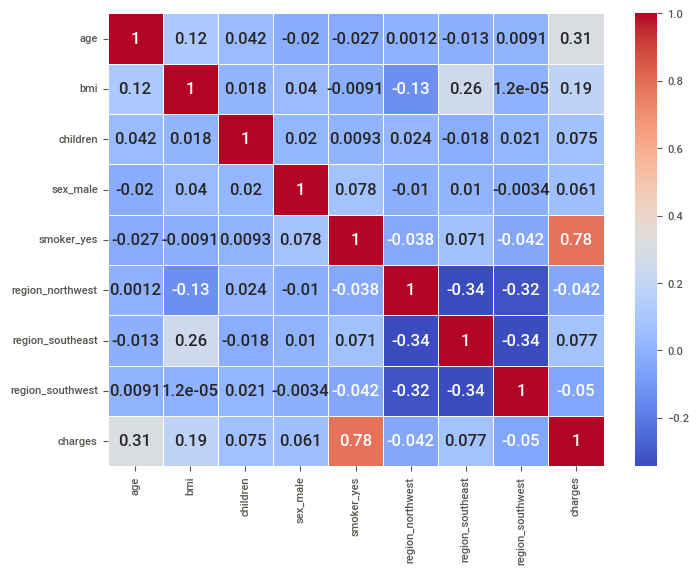

In [38]:
## Checking the correlation
plt.rcParams["figure.figsize"] = (8,6)
sns.heatmap(ins_df.corr(),annot=True, linewidths= .7,cmap="coolwarm")

smoker columns, age and bmi columns are highly correlated with Target charges

In [39]:
# Independent and dependent variable creation
X = ins_df.drop(['charges'],axis="columns")
y = ins_df['charges']

In [40]:
# Traning and testing data creation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=105)

In [41]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1102,29,38.940,1,1,0,0,1,0
1254,34,27.720,0,0,0,0,1,0
1207,36,33.400,2,1,1,0,0,1
1181,24,29.925,0,0,0,1,0,0
460,49,36.630,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1266,55,30.500,0,0,0,0,0,1
74,44,27.400,2,1,0,0,0,1
797,30,22.895,1,0,0,0,0,0
636,19,24.510,1,0,0,1,0,0


In [42]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1249,32,33.630,1,1,1,0,0,0
498,44,23.980,2,0,0,0,1,0
727,29,21.755,1,0,1,0,0,0
620,30,31.400,1,1,0,0,0,1
825,64,31.825,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
868,61,23.655,0,1,0,0,0,0
596,42,29.480,2,0,0,0,1,0
696,53,32.300,2,0,0,0,0,0
45,55,37.300,0,1,0,0,0,1


<AxesSubplot:>

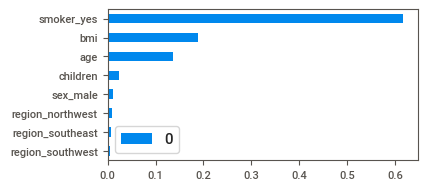

In [43]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
feature_importance = pd.DataFrame(model.feature_importances_,index=X.columns)
plt.rcParams["figure.figsize"] = (4,2)
feature_importance.sort_values(by = 0,ascending=True).plot(kind='barh')

smoker, bmi, age and children are important features with respect to target charges column

In [44]:
# Scaling the independent features data using standard scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[-0.7550007 ,  1.44687466, -0.09328357, ..., -0.5653322 ,
         1.66179597, -0.5667892 ],
       [-0.3974578 , -0.45219562, -0.92186113, ..., -0.5653322 ,
         1.66179597, -0.5667892 ],
       [-0.25444065,  0.50918755,  0.735294  , ..., -0.5653322 ,
        -0.60175859,  1.76432437],
       ...,
       [-0.68349212, -1.26886354, -0.09328357, ..., -0.5653322 ,
        -0.60175859, -0.5667892 ],
       [-1.47008648, -0.99551252, -0.09328357, ...,  1.76887146,
        -0.60175859, -0.5667892 ],
       [ 0.74667945, -1.15969239,  0.735294  , ..., -0.5653322 ,
         1.66179597, -0.5667892 ]])

In [46]:
X_test

array([[-0.54047496,  0.5481168 , -0.09328357, ..., -0.5653322 ,
        -0.60175859, -0.5667892 ],
       [ 0.31762798, -1.08521905,  0.735294  , ..., -0.5653322 ,
         1.66179597, -0.5667892 ],
       [-0.7550007 , -1.46181721, -0.09328357, ..., -0.5653322 ,
        -0.60175859, -0.5667892 ],
       ...,
       [ 0.96120519,  0.32300419,  0.735294  , ..., -0.5653322 ,
        -0.60175859, -0.5667892 ],
       [ 1.10422235,  1.16929219, -0.92186113, ..., -0.5653322 ,
        -0.60175859,  1.76432437],
       [-1.54159506, -1.2367046 , -0.92186113, ..., -0.5653322 ,
        -0.60175859, -0.5667892 ]])

Data Preprocessing and Feature Engineering - Observations and Actions taken:
1. There are no missing values in the provided dataset.
2. Checked for duplicates and found a duplicate row in the provided dataset. Then, removed the duplicate row.
3. Checked for outliers and found there are few outliers present in bmi column and many outliers in charges column.
4. Removed few outliers from charges column as there are only 7 individuals who are charged more than 50000.
5. Detected outliers using IQR for BMI columnn and removed fewoutliers from BMI column as there are only 9 rows.
6. One-Hot encoded the categorical features using get_dummies().
7. Scaled the independent features using standard scalar.
8. Ensured that there is no unwanted features in the dataset.
9. Checked the correlation of features in the dataset, smoker columns, age and bmi columns are highly correlated with Target charges.
10. Created Independent(X) and Dependent variable(y).
11. Identified the important features. smoker, bmi, age and children are important features with respect to target charges column.
12. Scaled the independent features data using standard scalar.

### Model Creation

##### Model creation using Linear Regression

In [47]:
# Creating model and checking accuracy
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
y_predict_model_linear = model_linear.predict(X_test)
print("Training Accuracy :",model_linear.score(X_train,y_train)*100)
print("Testing Accuracy :",model_linear.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_linear)
#Adj r2 = 1- (1-R2)* (n-1)/ (n-p-1) Where n is the sample size and p is the number of independent variables. Adjusted R2 requires number of independent variables as well.
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_linear))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_linear)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_linear))

Training Accuracy : 74.25586434412305
Testing Accuracy : 78.30292730159705
r2 Score : 0.7830292730159706
Adjusted r2 Score : 0.7762489377977196
Mean Squared error : 32273748.707315832
Root Mean Squared error : 5680.998918087895
Mean Absolute Error: 4086.075241544147


In [48]:
# Using KFold cross validation technique 
kfold_validation=KFold(5)
results=cross_val_score(model_linear,X,y,cv=kfold_validation)
print("Model Accuracy are within range {} and {}".format(results.min()*100,results.max()*100))
print("Average Accuracy : ",results.mean()*100)

Model Accuracy are within range 71.10293087554575 and 77.81265675882976
Average Accuracy :  74.90974686914585


In [49]:
results

array([0.76498874, 0.71102931, 0.77812657, 0.7267652 , 0.76457752])

In [50]:
#Applying Lasso Regularization Technique
model_lasso = Lasso(alpha=10, max_iter=100, tol=0.2)
model_lasso.fit(X_train,y_train)
model_lasso.score(X_test,y_test)

0.7839261382420992

No difference with model accuracy even after applying Lasso regularization technique

##### Model creation using Support Vector Regression

In [51]:
#Model creation using SVR
model_svr = SVR(kernel='rbf',C=1000)
model_svr.fit(X_train,y_train)
y_predict_model_svr= model_svr.predict(X_test)
print("Training Accuracy :",model_svr.score(X_train,y_train)*100)
print("Testing Accuracy :",model_svr.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_svr)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 73.57019170256957
Testing Accuracy : 74.1699702238011
r2 Score : 0.741699702238011
Adjusted r2 Score : 0.7336278179329487


In [52]:
# Using KFold cross validation technique
results=cross_val_score(model_linear,X,y,cv=kfold_validation)
print("Model Accuracy are within range {} and {}".format(results.min(),results.max()))
print("Average Test Accuracy : ",results.mean())

Model Accuracy are within range 0.7110293087554576 and 0.7781265675882976
Average Test Accuracy :  0.7490974686914585


In [53]:
results

array([0.76498874, 0.71102931, 0.77812657, 0.7267652 , 0.76457752])

Both Linear regression and SVR model is not performing well with the provided dataset

##### Model creation using Decision Tree

In [54]:
#Model creation using Decision Tree
model_decision_tree = DecisionTreeRegressor()
model_decision_tree.fit(X_train,y_train)
y_predict_model_decisiontree= model_decision_tree.predict(X_test)
print("Training Accuracy :",model_decision_tree.score(X_train,y_train)*100)
print("Testing Accuracy :",model_decision_tree.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_decisiontree)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 99.8691357209146
Testing Accuracy : 71.8909826012579
r2 Score : 0.718909826012579
Adjusted r2 Score : 0.7101257580754721


As the Training Accuracy is too high when compared with Testing Accuracy, this model is overfitting

In [55]:
# Hypertuning using Gridsearch cv for Decision tree Regressor
max_depth = [int(x) for x in np.linspace(1,30,num=15)]
min_samples_split = [int(x) for x in np.linspace(8,120,20)]
min_samples_leaf = [int(x) for x in np.linspace(1,30,num=15)]
tree_parameter = {
    'max_depth' :max_depth,
    'min_samples_split' :min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
clf = GridSearchCV(estimator=model_decision_tree,param_grid=tree_parameter,cv=5, scoring = 'r2',return_train_score=True)
clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 30],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 30],
                         'min_samples_split': [8, 13, 19, 25, 31, 37, 43, 49,
                                               55, 61, 66, 72, 78, 84, 90, 96,
                                               102, 108, 114, 120]},
             return_train_score=True, scoring='r2')

In [56]:
clf_dataframe = pd.DataFrame(clf.cv_results_)

In [57]:
clf.best_score_

0.8520096789686626

In [58]:
clf.best_index_

820

In [59]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 23, 'min_samples_split': 8}

In [60]:
clf_dataframe.iloc[820]

mean_fit_time                                                       0.003125
std_fit_time                                                         0.00625
mean_score_time                                                      0.00625
std_score_time                                                      0.007654
param_max_depth                                                            5
param_min_samples_leaf                                                    23
param_min_samples_split                                                    8
params                     {'max_depth': 5, 'min_samples_leaf': 23, 'min_...
split0_test_score                                                   0.877215
split1_test_score                                                   0.785342
split2_test_score                                                    0.88776
split3_test_score                                                   0.840067
split4_test_score                                                   0.869665

In [61]:
# Using best hyperparameters 
model_decision_hyper = DecisionTreeRegressor(max_depth=5,min_samples_leaf=23, min_samples_split=8)
model_decision_hyper.fit(X_train,y_train)
y_predict_model_decisionhyper= model_decision_hyper.predict(X_test)
print("Training Accuracy :",model_decision_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_decision_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_decisionhyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_decisionhyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_decisionhyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_decisionhyper))

Training Accuracy : 86.38994082938034
Testing Accuracy : 86.19797190252626
r2 Score : 0.8619797190252626
Adjusted r2 Score : 0.857666585244802
Mean Squared error : 20530105.2663186
Root Mean Squared error : 4531.015919892426
Mean Absolute Error: 2682.810399634038


Decision Tree model is performing good after using best hyperparameters found by using GridsearchCV technique

##### Model creation using Random Forest Regressor (Bagging Ensemble technique)

In [62]:
model_RF_regressor = RandomForestRegressor()
model_RF_regressor.fit(X_train,y_train)
y_predict_model_RF_regressor = model_RF_regressor.predict(X_test)
print("Training Accuracy :",model_RF_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_RF_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_RF_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 97.3955453826574
Testing Accuracy : 86.52307942357278
r2 Score : 0.8652307942357278
Adjusted r2 Score : 0.8610192565555943


As the Training Accuracy is too high when compared with Testing Accuracy, this model is overfitting

In [63]:
# Hypertuning using Gridsearch cv for Random Forest Regressor
n_estimators = [int(x) for x in np.linspace(50,1000,num=24)]
max_depth = [int(x) for x in np.linspace(1,30,num=15)]
min_samples_split = [int(x) for x in np.linspace(8,120,20)]
min_samples_leaf = [int(x) for x in np.linspace(1,30,num=15)]
parameter = {
    'n_estimators' : n_estimators,
    'max_depth' :max_depth,
    'min_samples_split' :min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}
rf = RandomizedSearchCV(estimator=model_RF_regressor,param_distributions=parameter,scoring='r2',random_state=3,cv=5,verbose=1,return_train_score=True)
rf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      30],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19, 21,
                                                             23, 25, 27, 30],
                                        'min_samples_split': [8, 13, 19, 25, 31,
                                                              37, 43, 49, 55,
                                                              61, 66, 72, 78,
                                                              84, 90, 96, 102,
                                                              108, 114, 120],
                                        'n_estimators': [50, 91, 132, 173, 215,
         

In [64]:
rf_dataframe = pd.DataFrame(rf.cv_results_)

In [65]:
rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 13,
 'min_samples_leaf': 11,
 'max_depth': 19}

In [66]:
rf.best_score_

0.8566820562249917

In [67]:
rf.best_index_

1

In [68]:
rf_dataframe.iloc[1]

mean_fit_time                                                       0.101514
std_fit_time                                                        0.006985
mean_score_time                                                     0.012504
std_score_time                                                      0.006252
param_n_estimators                                                        50
param_min_samples_split                                                   13
param_min_samples_leaf                                                    11
param_max_depth                                                           19
params                     {'n_estimators': 50, 'min_samples_split': 13, ...
split0_test_score                                                   0.882202
split1_test_score                                                    0.80097
split2_test_score                                                   0.890365
split3_test_score                                                   0.841783

In [69]:
# Using best hyperparameters 
model_RF_hyper = RandomForestRegressor(random_state=3,n_estimators=50,min_samples_split=13,min_samples_leaf=11,max_depth=19)
model_RF_hyper.fit(X_train,y_train)
y_predict_model_RF_hyper = model_RF_hyper.predict(X_test)
print("Training Accuracy :",model_RF_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_RF_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_RF_hyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_RF_hyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_RF_hyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_RF_hyper))

Training Accuracy : 88.27133218951192
Testing Accuracy : 87.8935461770524
r2 Score : 0.8789354617705241
Adjusted r2 Score : 0.875152194950853
Mean Squared error : 18007989.089113083
Root Mean Squared error : 4243.582105852682
Mean Absolute Error: 2445.1113698092945


Random Forest Regressor model is performing good and better than Decision tree model

##### Model creation using Adaboost Regressor (Boosting Ensemble technique)

In [70]:
model_adaboost = AdaBoostRegressor()
model_adaboost.fit(X_train,y_train)
y_predict_model_adaboost = model_adaboost.predict(X_test)
print("Training Accuracy :",model_adaboost.score(X_train,y_train)*100)
print("Testing Accuracy :",model_adaboost.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_adaboost)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 80.81627864882512
Testing Accuracy : 81.55298676613857
r2 Score : 0.8155298676613857
Adjusted r2 Score : 0.809765176025804


In [71]:
# Hypertuning using Randomized search cv for Adaboost Regressor
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 900, num = 30)]
learning_rate = [0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.024, 0.026]
parameter = {
    'n_estimators' :n_estimators,
    'learning_rate' :learning_rate
}
ad_hyp = RandomizedSearchCV(estimator=model_adaboost, param_distributions=parameter,random_state=4, cv=5,scoring='r2',verbose=1, return_train_score=True)
ad_hyp.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.012, 0.014,
                                                          0.016, 0.018, 0.02,
                                                          0.022, 0.024, 0.026],
                                        'n_estimators': [30, 60, 90, 120, 150,
                                                         180, 210, 240, 270,
                                                         300, 330, 360, 390,
                                                         420, 450, 480, 510,
                                                         540, 570, 600, 630,
                                                         660, 690, 720, 750,
                                                         780, 810, 840, 870,
                                                         900]},
                   random_state=4, return_train_score=True, scoring='r2',
                   verbose=1)

In [72]:
ad_hyp.best_params_

{'n_estimators': 60, 'learning_rate': 0.01}

In [73]:
ad_hyp.best_score_

0.8469490326234984

In [74]:
ad_hyp_dataframe = pd.DataFrame(ad_hyp.cv_results_)
ad_hyp.best_index_

9

In [75]:
ad_hyp_dataframe.iloc[9]

mean_fit_time                                             0.140609
std_fit_time                                              0.000001
mean_score_time                                                0.0
std_score_time                                                 0.0
param_n_estimators                                              60
param_learning_rate                                           0.01
params                 {'n_estimators': 60, 'learning_rate': 0.01}
split0_test_score                                         0.871911
split1_test_score                                         0.794766
split2_test_score                                         0.880504
split3_test_score                                         0.825361
split4_test_score                                         0.862202
mean_test_score                                           0.846949
std_test_score                                            0.032158
rank_test_score                                               

In [76]:
# Using best hyperparameters 
model_adaboost_hyper = AdaBoostRegressor(n_estimators=60,learning_rate=0.01,random_state=3)
model_adaboost_hyper.fit(X_train,y_train)
y_predict_model_adaboost_hyper = model_adaboost_hyper.predict(X_test)
print("Training Accuracy :",model_adaboost_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_adaboost_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_adaboost_hyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_adaboost_hyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_adaboost_hyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_adaboost_hyper))

Training Accuracy : 85.10887303079573
Testing Accuracy : 86.8591459663356
r2 Score : 0.868591459663356
Adjusted r2 Score : 0.8644849427778359
Mean Squared error : 19546628.560322765
Root Mean Squared error : 4421.1569255481945
Mean Absolute Error: 2902.0546022338744


Adaboost Model is not better than Random Forest Regressor

##### Model creation using Gradient Boosting Regressor (Boosting Ensemble technique)

In [77]:
model_GB_regressor = GradientBoostingRegressor()
model_GB_regressor.fit(X_train,y_train)
y_predict_model_GB_regressor = model_GB_regressor.predict(X_test)
print("Training Accuracy :",model_GB_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_GB_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_GB_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 89.92906886824927
Testing Accuracy : 87.4248187952276
r2 Score : 0.8742481879522759
Adjusted r2 Score : 0.8703184438257845


In [78]:
# Hypertuning using Randomized search cv for Gradient Boosting Regressor
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
learning_rate = [0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.024, 0.026]
criterion = ['friedman_mse', 'squared_error', 'mse']
parameter = {
    'n_estimators' :n_estimators,
    'learning_rate' :learning_rate,
    'criterion':criterion
}
gb_hyp = RandomizedSearchCV(estimator=model_GB_regressor,param_distributions=parameter,cv=5,scoring='r2',return_train_score=True,random_state=4,verbose=1)
gb_hyp.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.01, 0.012, 0.014,
                                                          0.016, 0.018, 0.02,
                                                          0.022, 0.024, 0.026],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000]},
                   random_state=4, return_train_score=True, scoring='r2',
                   verbose=1)

In [79]:
gb_hyp.best_params_

{'n_estimators': 450, 'learning_rate': 0.01, 'criterion': 'squared_error'}

In [80]:
gb_hyp_dataframe = pd.DataFrame(gb_hyp.cv_results_)

In [81]:
gb_hyp.best_index_

0

In [82]:
gb_hyp.best_score_

0.8601336438404583

In [83]:
gb_hyp_dataframe.iloc[0]

mean_fit_time                                                   0.465172
std_fit_time                                                    0.006116
mean_score_time                                                 0.006252
std_score_time                                                  0.007657
param_n_estimators                                                   450
param_learning_rate                                                 0.01
param_criterion                                            squared_error
params                 {'n_estimators': 450, 'learning_rate': 0.01, '...
split0_test_score                                               0.886312
split1_test_score                                               0.807414
split2_test_score                                               0.888761
split3_test_score                                                0.84527
split4_test_score                                               0.872911
mean_test_score                                    

In [84]:
# Using best hyperparameters 
model_GB_hyper = GradientBoostingRegressor(random_state=3,n_estimators=450,learning_rate=0.01,criterion='squared_error')
model_GB_hyper.fit(X_train,y_train)
y_predict_model_GB_hyper = model_GB_hyper.predict(X_test)
print("Training Accuracy :",model_GB_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_GB_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_GB_hyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_GB_hyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_GB_hyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_GB_hyper))

Training Accuracy : 87.41309716166809
Testing Accuracy : 87.70958638383695
r2 Score : 0.8770958638383695
Adjusted r2 Score : 0.8732551095833185
Mean Squared error : 18281623.796477214
Root Mean Squared error : 4275.7015560580485
Mean Absolute Error: 2473.9644579846854


Gradient Boosting Regressor and Random Forest Regressor Model are performing good

##### Model creation using XGBoost Regressor (Boosting Ensemble technique)

In [85]:
model_XGB_regressor = XGBRegressor()
model_XGB_regressor.fit(X_train,y_train)
y_predict_model_XGB_regressor = model_XGB_regressor.predict(X_test)
print("Training Accuracy :",model_XGB_regressor.score(X_train,y_train)*100)
print("Testing Accuracy :",model_XGB_regressor.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_XGB_regressor)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)

Training Accuracy : 99.38103819345136
Testing Accuracy : 83.178512639998
r2 Score : 0.83178512639998
Adjusted r2 Score : 0.8265284115999794


In [86]:
# Hypertuning using Randomized search cv for XG Boosting Regressor
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
learning_rate = [0.01,0.012,0.014,0.016,0.18,0.02,0.022,0.024]
parameter = {
    'n_estimators' :n_estimators,
    'learning_rate' :learning_rate,
}
xg_hyp = RandomizedSearchCV(estimator=model_XGB_regressor,param_distributions=parameter,cv=5,scoring='r2',return_train_score=True,verbose=1, random_state=4)
xg_hyp.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto

In [87]:
xg_hyp.best_params_

{'n_estimators': 350, 'learning_rate': 0.012}

In [88]:
xg_hyp.best_score_

0.8488687515918645

In [89]:
xg_hyp_dataframe = pd.DataFrame(xg_hyp.cv_results_)

In [90]:
xg_hyp.best_index_

2

In [91]:
xg_hyp_dataframe.iloc[2]

mean_fit_time                                               0.478093
std_fit_time                                                0.007653
mean_score_time                                             0.012499
std_score_time                                              0.006249
param_n_estimators                                               350
param_learning_rate                                            0.012
params                 {'n_estimators': 350, 'learning_rate': 0.012}
split0_test_score                                           0.870402
split1_test_score                                           0.787584
split2_test_score                                           0.888311
split3_test_score                                           0.839129
split4_test_score                                           0.858917
mean_test_score                                             0.848869
std_test_score                                              0.034557
rank_test_score                   

In [92]:
# Using best hyperparameters 
model_XGB_hyper = XGBRegressor(n_estimators=350,learning_rate=0.012)
model_XGB_hyper.fit(X_train,y_train)
y_predict_model_XGB_hyper = model_XGB_hyper.predict(X_test)
print("Training Accuracy :",model_XGB_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_XGB_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_XGB_hyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_XGB_hyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_XGB_hyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_XGB_hyper))

Training Accuracy : 92.38031205432324
Testing Accuracy : 86.7231632545964
r2 Score : 0.867231632545964
Adjusted r2 Score : 0.8630826210630254
Mean Squared error : 19748898.78950135
Root Mean Squared error : 4443.973311069875
Mean Absolute Error: 2371.824966792011


XGB Regressor model is not performing better than Gradient Boosting Regressor and Random Forest Regressor Model

#### Model Creation using MLP Regressor

In [94]:
# using 2 hidden layers
model_mlp = MLPRegressor(activation ='relu', hidden_layer_sizes =(300,300,), max_iter= 1030, random_state=3,verbose=True,learning_rate_init=0.0015)
model_mlp.fit(X_train,y_train) 
y_predict_model_mlp = model_mlp.predict(X_test)

Iteration 1, loss = 152970822.83144110
Iteration 2, loss = 152916989.03256023
Iteration 3, loss = 152834839.86172751
Iteration 4, loss = 152710160.87149280
Iteration 5, loss = 152531921.52942869
Iteration 6, loss = 152266760.27105427
Iteration 7, loss = 151897850.04988924
Iteration 8, loss = 151393734.57278535
Iteration 9, loss = 150724916.07001266
Iteration 10, loss = 149864681.18594638
Iteration 11, loss = 148747463.21248251
Iteration 12, loss = 147366047.04658705
Iteration 13, loss = 145655264.74427047
Iteration 14, loss = 143502073.39498660
Iteration 15, loss = 141078934.56044495
Iteration 16, loss = 138083904.96500149
Iteration 17, loss = 134716672.47804889
Iteration 18, loss = 130814097.49018677
Iteration 19, loss = 126307360.74694155
Iteration 20, loss = 121477065.38756502
Iteration 21, loss = 116030971.36870316
Iteration 22, loss = 110203733.85987557
Iteration 23, loss = 104196973.71387848
Iteration 24, loss = 97846241.67908351
Iteration 25, loss = 91127370.77674916
Iteration 2

Iteration 212, loss = 12569259.10838269
Iteration 213, loss = 12546713.02269827
Iteration 214, loss = 12526300.70747125
Iteration 215, loss = 12498766.55412214
Iteration 216, loss = 12474389.04505427
Iteration 217, loss = 12453939.11884676
Iteration 218, loss = 12431958.85400784
Iteration 219, loss = 12411720.31741185
Iteration 220, loss = 12391860.08705714
Iteration 221, loss = 12369029.07843470
Iteration 222, loss = 12350785.36231836
Iteration 223, loss = 12333548.47179691
Iteration 224, loss = 12306927.87738668
Iteration 225, loss = 12289898.94752602
Iteration 226, loss = 12265231.82334550
Iteration 227, loss = 12243889.71513326
Iteration 228, loss = 12222101.49697161
Iteration 229, loss = 12204558.16642864
Iteration 230, loss = 12183576.39112633
Iteration 231, loss = 12166301.07916648
Iteration 232, loss = 12146635.86333821
Iteration 233, loss = 12127972.73087985
Iteration 234, loss = 12109698.08203584
Iteration 235, loss = 12083900.25031305
Iteration 236, loss = 12070139.22155711


Iteration 421, loss = 10113742.23534019
Iteration 422, loss = 10107607.31595865
Iteration 423, loss = 10103143.25587524
Iteration 424, loss = 10096647.10131723
Iteration 425, loss = 10095957.70125824
Iteration 426, loss = 10083951.57537142
Iteration 427, loss = 10081956.16236538
Iteration 428, loss = 10071928.07189681
Iteration 429, loss = 10066432.57705409
Iteration 430, loss = 10061777.43275027
Iteration 431, loss = 10054830.58265667
Iteration 432, loss = 10049293.47697455
Iteration 433, loss = 10046361.41287657
Iteration 434, loss = 10038420.32286714
Iteration 435, loss = 10032643.57974634
Iteration 436, loss = 10030225.08559693
Iteration 437, loss = 10020468.46103150
Iteration 438, loss = 10018483.31411764
Iteration 439, loss = 10010361.99722853
Iteration 440, loss = 10009027.06607274
Iteration 441, loss = 9998980.13183469
Iteration 442, loss = 9999856.77527094
Iteration 443, loss = 9995436.25798181
Iteration 444, loss = 9991205.69190500
Iteration 445, loss = 9979008.27681209
Itera

Iteration 634, loss = 9226826.16619555
Iteration 635, loss = 9225562.43565602
Iteration 636, loss = 9214274.05597929
Iteration 637, loss = 9215019.00744418
Iteration 638, loss = 9215592.79265380
Iteration 639, loss = 9225235.91205146
Iteration 640, loss = 9214246.43491096
Iteration 641, loss = 9211294.43984042
Iteration 642, loss = 9200832.21591695
Iteration 643, loss = 9199752.82892198
Iteration 644, loss = 9200005.31816840
Iteration 645, loss = 9203077.54461764
Iteration 646, loss = 9202179.76209457
Iteration 647, loss = 9194979.83520380
Iteration 648, loss = 9187652.34721443
Iteration 649, loss = 9184517.10965285
Iteration 650, loss = 9176617.03733701
Iteration 651, loss = 9178918.68111223
Iteration 652, loss = 9177470.30544618
Iteration 653, loss = 9172157.47015750
Iteration 654, loss = 9166489.26691369
Iteration 655, loss = 9168650.43832956
Iteration 656, loss = 9167596.18184238
Iteration 657, loss = 9161771.28908706
Iteration 658, loss = 9163679.36709836
Iteration 659, loss = 915

Iteration 847, loss = 8693413.41337598
Iteration 848, loss = 8694948.82125005
Iteration 849, loss = 8705868.48007908
Iteration 850, loss = 8711434.35984674
Iteration 851, loss = 8690911.13729768
Iteration 852, loss = 8686484.07595118
Iteration 853, loss = 8690651.61580056
Iteration 854, loss = 8684038.28875113
Iteration 855, loss = 8681322.81505145
Iteration 856, loss = 8683929.29091363
Iteration 857, loss = 8675253.08631905
Iteration 858, loss = 8675762.81947359
Iteration 859, loss = 8672420.66947808
Iteration 860, loss = 8666004.63850898
Iteration 861, loss = 8670089.77715763
Iteration 862, loss = 8662146.80162635
Iteration 863, loss = 8662042.51815610
Iteration 864, loss = 8657875.24995062
Iteration 865, loss = 8662517.34786582
Iteration 866, loss = 8657200.30773741
Iteration 867, loss = 8658431.68045945
Iteration 868, loss = 8646523.93132471
Iteration 869, loss = 8647160.46814450
Iteration 870, loss = 8640133.30809472
Iteration 871, loss = 8645163.03762636
Iteration 872, loss = 864

In [95]:
print("Training Accuracy :",model_mlp.score(X_train,y_train)*100)
print("Testing Accuracy :",model_mlp.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_mlp)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_mlp))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_mlp)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_mlp))

Training Accuracy : 87.49134387612943
Testing Accuracy : 87.58825078759531
r2 Score : 0.8758825078759531
Adjusted r2 Score : 0.8720038362470767
Mean Squared error : 18462106.878079407
Root Mean Squared error : 4296.755389602648
Mean Absolute Error: 2457.8335102871674


MLP Regressor model is not performing well when compared to Gradient Boosting Regressor and Random Forest Regressor Model

#### y_test vs y_predicted values

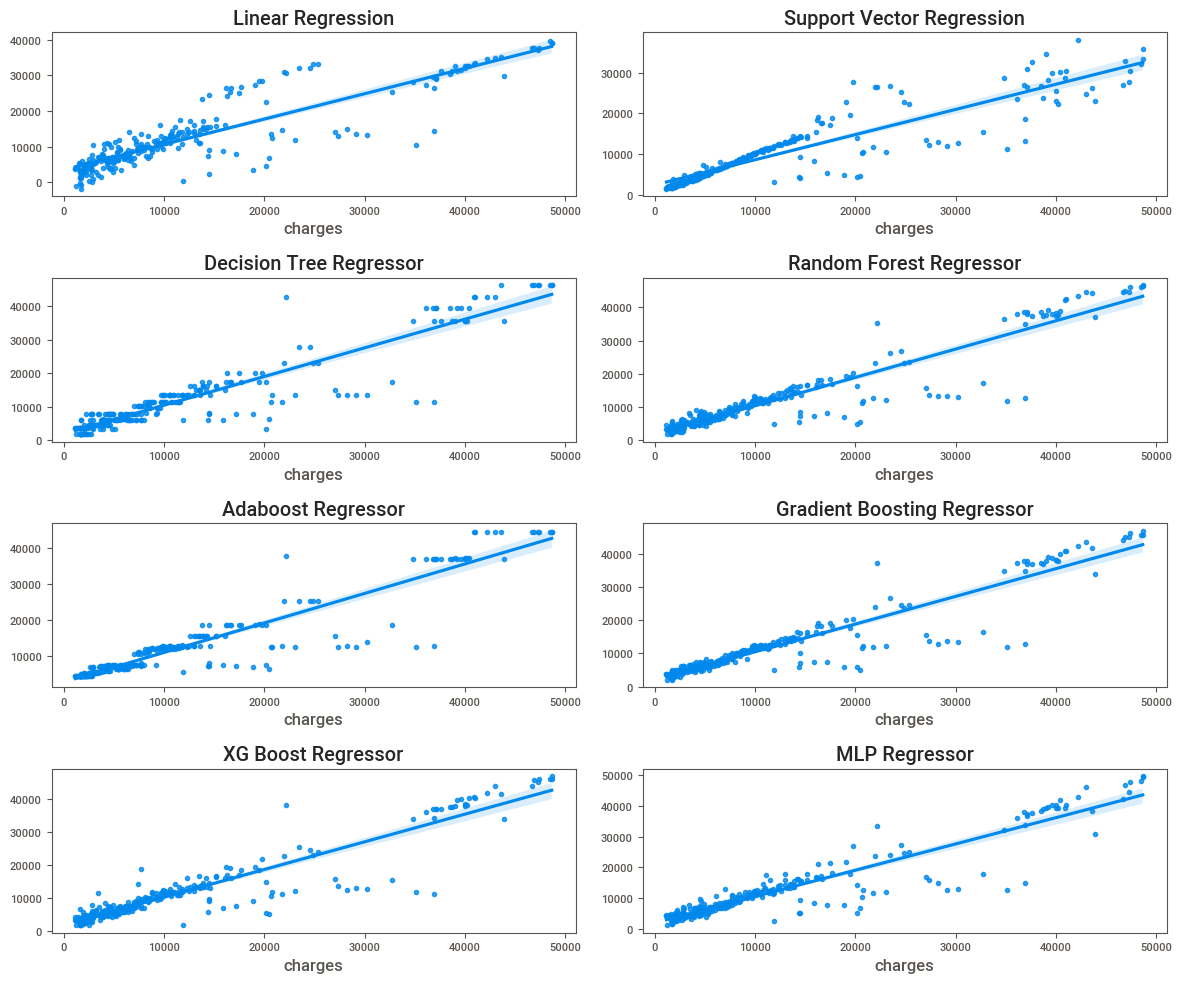

In [96]:
plt.rcParams["figure.figsize"] = (12,10)
fig, axes = plt.subplots(4,2)
sns.regplot(x= y_test,y=y_predict_model_linear, ax=axes[0,0]).set(title='Linear Regression')
sns.regplot(x= y_test,y=y_predict_model_svr, ax=axes[0,1]).set(title='Support Vector Regression')
sns.regplot(x= y_test,y=y_predict_model_decisionhyper, ax=axes[1,0]).set(title='Decision Tree Regressor')
sns.regplot(x= y_test,y=y_predict_model_RF_hyper, ax=axes[1,1]).set(title='Random Forest Regressor')
sns.regplot(x= y_test,y=y_predict_model_adaboost_hyper, ax=axes[2,0]).set(title='Adaboost Regressor')
sns.regplot(x= y_test,y=y_predict_model_GB_hyper, ax=axes[2,1]).set(title='Gradient Boosting Regressor')
sns.regplot(x= y_test,y=y_predict_model_XGB_hyper, ax=axes[3,0]).set(title='XG Boost Regressor')
sns.regplot(x= y_test,y=y_predict_model_mlp, ax=axes[3,1]).set(title='MLP Regressor')
plt.tight_layout()

### Random Forest is the best generalized model with least MSE/MAE to predict the insurance price charged to the customer 

#### Random Forest Performance Metrics

In [97]:
print("Training Accuracy :",model_RF_hyper.score(X_train,y_train)*100)
print("Testing Accuracy :",model_RF_hyper.score(X_test,y_test)*100)
r2score=r2_score(y_test,y_predict_model_RF_hyper)
adjusted_r2score= 1- (1-r2score)* (y_test.count()-1) / (y_test.count()-8-1)
print("r2 Score :",r2score)
print("Adjusted r2 Score :",adjusted_r2score)
print("Mean Squared error :",mean_squared_error(y_test,y_predict_model_RF_hyper))
print("Root Mean Squared error :",math.sqrt(mean_squared_error(y_test,y_predict_model_RF_hyper)))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_predict_model_RF_hyper))

Training Accuracy : 88.27133218951192
Testing Accuracy : 87.8935461770524
r2 Score : 0.8789354617705241
Adjusted r2 Score : 0.875152194950853
Mean Squared error : 18007989.089113083
Root Mean Squared error : 4243.582105852682
Mean Absolute Error: 2445.1113698092945
